# Original Dataset

In [1]:
import pandas as pd
import os
import h5py
import numpy as np

pd.set_option("display.max_columns",60)
rootdir = './data/msd/A'
df = pd.DataFrame()
first = True
feature_dict = dict()
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if(len(file) == len('TRAAAAW128F429D538.h5')):
            store = pd.HDFStore(subdir+'/'+file)
            f = h5py.File(subdir+'/'+file, 'r')
            if(first):
                first=False
                # List all groups
                print("Keys: %s" % f.keys())
                a_group_key = list(f.keys())[0]
                b_group_key = list(f.keys())[1]
                c_group_key = list(f.keys())[2]
                group_key = [a_group_key, b_group_key, c_group_key]

                # Get the data
                indices = list(f[a_group_key])+list(f[b_group_key])+list(f[c_group_key])
                indices.remove('songs')
                indices.remove('songs')
                indices.remove('songs')
                print(indices)
                
            df = df.append(pd.concat([store['/analysis/songs'],store['/metadata/songs'],store['/musicbrainz/songs']],axis=1))
            attributes = dict()
            for i in group_key:
                for j in f[i]:
                    if(j!='songs'):
                        attributes[j] = list(f[i][j])
            feature_dict[store['/analysis/songs'].get_value(0,'track_id')] = attributes

df = df.reindex_axis(sorted(df.columns), axis=1).set_index('track_id')



Keys: KeysView(<HDF5 file "TRAAAAW128F429D538.h5" (mode r)>)
['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'tatums_confidence', 'tatums_start', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'similar_artists', 'artist_mbtags', 'artist_mbtags_count']


analysis sample rate | float | sample rate of the audio used : DROP

artist 7digitalid | int | ID from 7digital.com or -1 : DROP

artist familiarity | float | algorithmic estimation	: KEEP, between 0 and 1

artist hotttnesss | float | algorithmic estimation : KEEP, between 0 and 1 but some values greater than 1

artist id | string | Echo Nest ID : KEEP

artist latitude | float | latitude : KEEP

artist location | string | location name : KEEP

artist longitude | float | longitude : KEEP	

artist mbid | string | ID from musicbrainz.org : DROP

artist mbtags | array string | tags from musicbrainz.org : KEEP

artist mbtags count | array int | tag counts for musicbrainz tags : KEEP

artist name | string | artist name : KEEP

artist playmeid | int | ID from playme.com, or -1 : DROP

artist terms | array string | Echo Nest tags : KEEP

artist terms freq | array float | Echo Nest tags freqs : KEEP

artist terms weight | array float | Echo Nest tags weight : KEEP

audio md5 | string | audio hash code : DROP

bars confidence | array float | confidence measure : DROP ?

bars start | array float | beginning of bars, usually on a beat	: DROP ?

beats confidence | array float | confidence measure	: DROP ? 

beats start | array float | result of beat tracking	: DROP ?

danceability | float | algorithmic estimation : KEEP ?

duration | float | in seconds : KEEP

end of fade in | float | seconds at the beginning of the song : DROP ?

energy | float | energy from listener point of view : KEEP

key | int | key the song is in : KEEP between 0 and 11

key confidence | float | confidence measure	: DROP ?

loudness | float | overall loudness in dB : KEEP relative mesure (negative)

mode | int | major or minor : KEEP between 0 and 1

mode confidence | float | confidence measure : DROP ?

release | string | album name : KEEP

release 7digitalid | int | ID from 7digital.com or -1 : DROP

sections confidence | array float | confidence measure : DROP

sections start | array float | largest grouping in a song, e.g. verse : DROP

segments confidence | array float | confidence measure : DROP

segments loudness max | array float | max dB value : DROP

segments loudness max time | array float | time of max dB value, i.e. end of attack : DROP

segments loudness max start | array float | dB value at onset : DROP

segments pitches | 2D array float | chroma feature, one value per note : DROP

segments start | array float | musical events, ~ note onsets : DROP

segments timbre | 2D array float | texture features (MFCC+PCA-like) : DROP

similar artists | array string | Echo Nest artist IDs (sim. algo. unpublished) : KEEP

song hotttnesss | float | algorithmic estimation : KEEP	lot of NaN

song id | string | Echo Nest song ID : KEEP used in Taste profile subset

start of fade out | float | time in sec	url : DROP

tatums confidence | array float | confidence measure : DROP

tatums start | array float | smallest rythmic element : DROP

tempo | float | estimated tempo in BPM : KEEP

time signature | int | estimate of number of beats per bar, e.g. 4 : DROP

time signature confidence | float | confidence measure : DROP

title | string | song title : KEEP

track id | string | Echo Nest track ID : KEEP	

track 7digitalid | int | ID from 7digital.com or -1 : DROP

year | int | song release year from MusicBrainz or 0 : KEEP	lots of NaN

We can also drop useless indices in the dataframe that correspond to arrays and the 'genre' value which is supposed to be a string is not appearing in the field list.

In [2]:
pd.set_option("display.max_rows",600)
df.sort_values('artist_familiarity',ascending=False).head()

,analysis_sample_rate,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,audio_md5,danceability,duration,end_of_fade_in,energy,genre,idx_artist_mbtags,idx_artist_terms,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,idx_sections_start,idx_segments_confidence,idx_segments_loudness_max,idx_segments_loudness_max_time,idx_segments_loudness_start,idx_segments_pitches,idx_segments_start,idx_segments_timbre,idx_similar_artists,idx_tatums_confidence,idx_tatums_start,key,key_confidence,loudness,mode,mode_confidence,release,release_7digitalid,song_hotttnesss,song_id,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,year
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TRAARHS128F931689D,22050,,616,0.918452,0.819588,ARVG4OK1187B9B6BD3,NaN,,NaN,95e1ead9-4d31-4808-a7ac-32c3614c116b,The Killers,1573,8e9c98b99ebdc55f494436a4d5139631,0.0,284.34240,0.206,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.490,-6.546,1,0.469,Hitzone 49,624887,NaN,SOGOQGE12AB0182907,267.685,151.953,4,0.198,Spaceman,6937326,2008
TRAAQCK128F92E8C33,22050,,24981,0.916058,0.535408,ARKZJ301187FB521B2,NaN,LDN,NaN,6e0c7c0e-cba5-4c2c-a652-38f71ef5785d,Lily Allen,4702,0d0956a7419bbee27fa80c08b3c73c86,0.0,264.69832,0.000,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0.594,-5.871,1,0.509,Alright_ Still (Deluxe),435050,0.566988,SOFJNQR12A6D4FAE92,251.141,156.097,4,1.000,U Killed It,4846225,2006
TRAANTZ128E0792529,22050,,7338,0.905777,0.598459,ARK9TRQ1187B99C095,41.50471,"Cleveland, OH",-81.69074,b7ffd2af-418f-4be2-bdd1-22f8b48613da,Nine Inch Nails,-1,5b4d35b31ece90b927c4513203d749b4,0.0,168.56771,0.000,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0.576,-16.968,0,0.621,Things Falling Apart,15567,NaN,SOKIGWD12A6701DE9D,159.637,130.284,4,0.706,The Frail,163540,1999
TRAAGEC128E079252C,22050,,7338,0.905777,0.598459,ARK9TRQ1187B99C095,41.50471,"Cleveland, OH",-81.69074,b7ffd2af-418f-4be2-bdd1-22f8b48613da,Nine Inch Nails,-1,ce020c3664096562bec86adc6eddd862,0.0,426.89261,0.286,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050,-12.951,0,0.395,Things Falling Apart,15567,0.635537,SOKBBXO12A6701DEA0,399.900,63.017,4,0.378,Metal,163543,2000
TRAAPVV128F425D64C,22050,,17428,0.892689,0.852186,ARXOTQH1187FB57084,NaN,"Fairfax, California",NaN,e1009244-1bf4-4a4c-889e-0db83b9be08f,Chris Brown,2729,ece2d2c47257446051e6a7b288b05a16,0.0,363.59791,0.090,0.0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.638,-4.376,1,0.371,Forever,279702,NaN,SOSGQPS12A8AE48538,353.913,139.998,4,0.548,Forever,3119613,0


In [3]:
track = 'TRAADLN128F14832E9'
print(feature_dict[track]['similar_artists'])
print()
for artist in feature_dict[track]['similar_artists']:
    try :
        print(df['artist_name'][track]+' is similar to '+df['artist_name'][df.index[df['artist_id']==artist.decode("utf-8")][0]])
    except :
        pass

[b'ARSAIUN1187FB398D3', b'ARC73361187B9B42BD', b'ARDIBRT1187B9AF176', b'ARIO65L1187FB4D25F', b'AROCBZZ11E2835D652', b'ARBZ6CQ1187FB3CBE6', b'ARAPIIU1187B98FAC9', b'AR8SRQ31187FB4D477', b'ARCOBLE1187B9A2446', b'AREMCBW12454A2E9CB', b'AROJ4691187FB3EC1C', b'ARUKN9H1187B9B71C8', b'ARLIBVA1187B99074B', b'ARFWLXM1187B9B5EE5', b'ARLAUED1187B9ACEAF', b'ARP6N5A1187B99D1A3', b'AR5FP401187FB523C9', b'ARXIFJD124549A3AF1', b'ARCCTQI1187B98E46D', b'ARX18ET1187FB4D179', b'ARPISA41187FB3DE42', b'ARQUR4L1187B9AF6BC', b'AR2I0S21187FB50D90', b'ARZGU111187B9A5E10', b'ARS1OWB1187B99EEAD', b'AR6BJ1V1187B9AE3B7', b'ARYGO6R1187B9A7822', b'ARBYGAH1187FB447C4', b'AR12F2S1187FB56EEF', b'AR6XZ861187FB4CECD', b'ARJA1841187FB3A029', b'ART3O5Z1187B9AB043', b'AR4U2DD1187FB3B987', b'AR27AEB1187B98D39D', b'ARN9QAY1187FB3A0F6', b'ARUP0001187FB39B04', b'ARGJ7R91187B9AF64A', b'ARUFIU21187FB544DE', b'AR1IA8J1187B991EDF', b'AR1VWD91187FB4CE99', b'ARDPUIY12454A379E1', b'AR7GM0K1187B9B74B4', b'AR37K6O1187B9AD049', b'ARWX5TK1

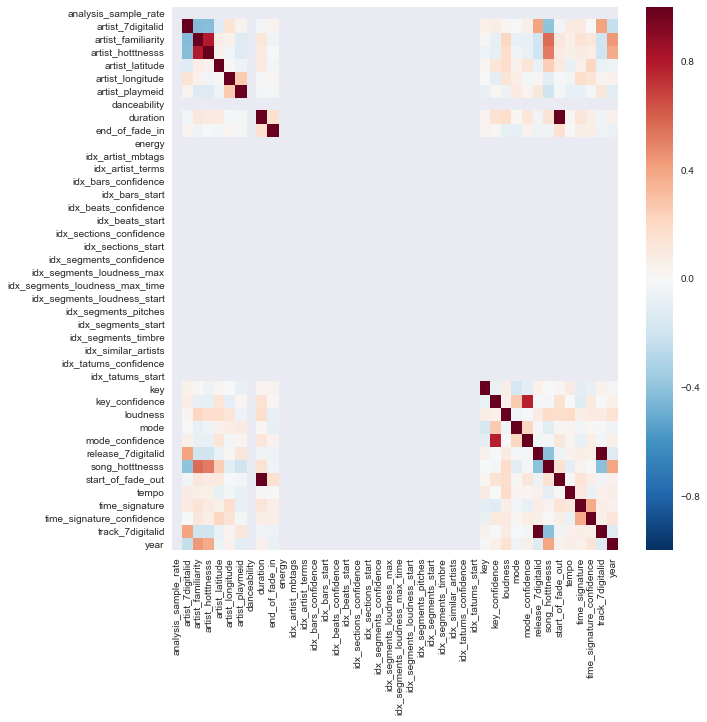

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax = ax)
plt.show()

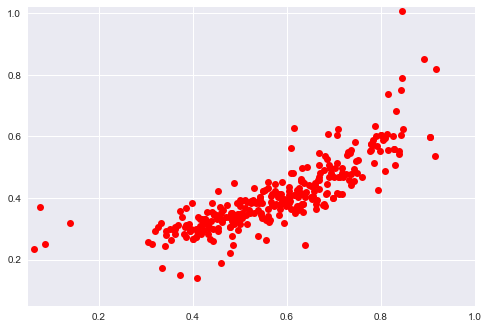

In [5]:
plt.plot(list(df['artist_familiarity']),list(df['artist_hotttnesss']),'ro')
plt.ylim([0.05,1.02])
plt.xlim([0.05,1])
plt.show()

# SecondHand Dataset

In [14]:
from pprint import pprint

with open('./data/shs_dataset_train.txt', encoding='utf-8') as f:
    content = f.readlines()
content = [x.strip() for x in content]
content[14]
second_hand = dict()
for i in range(14,len(content)):
    if(content[i][0] == '%'):
        content[i]=content[i].split(sep = ',')
        title = content[i][len(content[i])-1]
        covers = list()
        i+=1
        while(i< len(content) and content[i][0] != '%') :
            content[i]=content[i].split(sep = '<SEP>')
            cover = {
                    'track_id': content[i][0],
                    'artist_id': content[i][1],
                    'shs_perf': content[i][2]
            }
            covers.append(cover)
            i+=1
        second_hand[title] = covers
        
for a in second_hand:
    print(a+" :")
    pprint(second_hand[a])
    break

 Oblivious (song for Galaxy 500 tribute) :
[{'artist_id': 'ARD914N1187FB56BDD',
  'shs_perf': '60057',
  'track_id': 'TRRCQCO128F42B2051'},
 {'artist_id': 'ARFULGF1187FB5690C',
  'shs_perf': '60051',
  'track_id': 'TRBWYDX12903CD6A0D'}]


I don't think keeping the shs performance is useful as well as the work ids from shs website.

# MusicXMatch Dataset

In [9]:
from pprint import pprint

with open('./data/mxm_dataset_train.txt', encoding='utf-8') as f:
    content = f.readlines()
content = [x.strip() for x in content]
word_idx = content[17].split(sep = ',')

lyrics= dict()
for i in range(18,len(content)):
    content[i]=content[i].split(sep = ',')
    words = dict()
    for j in range(2,len(content[i])):
        line = content[i][j].split(sep=':')
        words[line[0]]=line[1]
    lyrics[content[i][0]] = words  
    
for a in lyrics:
    pprint(lyrics[a])
    break

{'1': '11',
 '101': '1',
 '107': '1',
 '108': '1',
 '11': '21',
 '12': '1',
 '121': '20',
 '129': '7',
 '13': '1',
 '130': '1',
 '135': '1',
 '142': '1',
 '147': '13',
 '15': '1',
 '152': '1',
 '16': '2',
 '160': '2',
 '17': '20',
 '18': '20',
 '188': '1',
 '2': '1',
 '20': '1',
 '21': '1',
 '22': '1',
 '23': '1',
 '232': '1',
 '233': '1',
 '24': '1',
 '241': '1',
 '244': '1',
 '265': '1',
 '27': '2',
 '289': '1',
 '29': '1',
 '3': '31',
 '30': '1',
 '32': '1',
 '331': '1',
 '336': '1',
 '37': '1',
 '396': '1',
 '4': '2',
 '416': '1',
 '46': '1',
 '466': '1',
 '48': '1',
 '495': '1',
 '5': '3',
 '525': '1',
 '546': '1',
 '55': '3',
 '56': '1',
 '61': '1',
 '63': '1',
 '686': '1',
 '7': '2',
 '70': '2',
 '71': '1',
 '73': '1',
 '74': '1',
 '76': '2',
 '780': '1',
 '8': '1',
 '82': '1',
 '83': '1',
 '9': '5'}


In [11]:
for t in lyrics:
    try:
        print(df['title'][t]+" by "+df['artist_name'][t]+"\n")
        print()
        for word in lyrics[t]:
            print(repr(word_idx[int(word)]+" : "+repr(lyrics[t][word])))
        print()
        break
    except:
        pass
    

I Can't Stop Loving You by Martina McBride


"understand : '1'"
"us : '2'"
"yeah : '3'"
"my : '5'"
"to : '4'"
"mi : '1'"
"of : '1'"
"tell : '1'"
"must : '1'"
"me : '3'"
"here : '1'"
"non : '1'"
"strong : '2'"
"um : '1'"
"summer : '1'"
"am : '2'"
"the : '9'"
"when : '3'"
"goe : '1'"
"in : '4'"
"let : '2'"
"wide : '3'"
"day : '4'"
"and : '4'"
"invis : '2'"
"again : '5'"
"take : '3'"
"goodby : '1'"
"do : '2'"
"tonight : '4'"
"know : '3'"
"cri : '1'"
"with : '1'"
"not : '2'"
"nah : '2'"
"way : '1'"
"queen : '1'"
"can : '4'"
"is : '5'"
"break : '2'"
"oh : '2'"
"la : '1'"
"it : '1'"
"con : '1'"
"white : '1'"
"att : '1'"
"so : '2'"
"buri : '1'"
"anymor : '1'"
"love : '3'"
"out : '2'"
"an : '2'"
"all : '3'"
"your : '5'"
"well : '3'"



# LastFM Dataset

In [23]:
import json
from pprint import pprint

lastfm_dir = './data/lastfm/A'
data = dict()
for subdir, dirs, files in os.walk(lastfm_dir):
    for file in files:
        if(len(file) == len('TRAAAAW128F429D538.json')):
            track = json.load(open(subdir+'/'+file))
            data[track['track_id']] = track
            break
    
for a in data:
    pprint(data[a])
    break

{'artist': 'Martina McBride',
 'similars': [['TRNPYIM128F92CD68C', 0.097339],
              ['TROLKTX128F92FAC5B', 0.0892868],
              ['TRNAVXL128F428D1AC', 0.0820861],
              ['TRWCUYA128F421CB55', 0.0723185],
              ['TRCNMXM128F4277CAD', 0.0599099],
              ['TRZSZRS128F1461F10', 0.05935],
              ['TRWSFEA128F4277CA3', 0.0550761],
              ['TRNTKFQ128F424809E', 0.0543928],
              ['TRLQSZC128F42BBAED', 0.0530955],
              ['TRGPWXE128F42480A2', 0.0498316],
              ['TRJVAPS128F42659EE', 0.0465158],
              ['TROOWKH128F931EC73', 0.0465158],
              ['TRYNWQT128F42BBAF4', 0.0456054],
              ['TRENNGC128F1455E87', 0.0423932],
              ['TRICMQX12903CFBD28', 0.0418128],
              ['TRJHISB12903CE4739', 0.0398498],
              ['TRRXVJM128F92F881E', 0.0397344],
              ['TRLXWJY12903CCE727', 0.0396307],
              ['TRUFKLI12903CFBD1F', 0.0382773],
              ['TRQRPWK128F427E63A', 0.037

Dict consisting of track_id linked to artist name, similar songs with similarity mesure, list of tags with integer of unknown purpose (weight ?), timestamp that can be dropped, title and track_id can be dropped.

# Taste Profile Dataset

(Didn't found a subset)
We can see that it uses the song ids as indices whereas all other subsets use the track ids which might cause some problems.